## Problem Statement: Estimate Fare Prices
Continuous Data hence Linear regression, Decision Tree regressor and Random Forest regressor will be applied as machine learning algorithms 

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

Linear Regression, Decision Tree Regressor, Random Forest Regressor 
- https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
- https://www.kaggle.com/code/muhammadannasimtiaz/uber-fare-prediction/notebook
- https://bobbyhadz.com/blog/python-no-module-named-geopandas

#### The dataset contains the following fields:
- key -a unique identifier for each trip
- fare_amount -the cost of each trip in usd 
- pickup_datetime -date and time when the meter was engaged 
- passenger_count -the number of passengers in the vehicle (driver entered value)
- pickup_longitude -the longitude where the meter was engaged 
- pickup_latitude -the latitude where the meter was engaged 
- dropoff_longitude -the longitude where the meter was disengaged
- dropoff_latitude -the latitude where the meter was disengaged 


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from math import radians

In [5]:
fare_data = pd.read_csv('uber.csv')

Read a comma-separated values (csv) file into DataFrame.

In [6]:
fare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [7]:
fare_data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


The head() method returns a specified number of rows, string from the top. The head() method returns the first 5 rows if a number is not specified. Note: The column names will also be returned, in addition to the specified rows.

In [8]:
fare_data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


The describe() method returns description of the data in the DataFrame.

Only two column missing data, i.e. dropoff_longitude and dropff_latitude 

Mix of numerical and categorical variables:
- Numerical variables:
    - pickup_datetime
    - pickup_latitude 
    - pickup_longitude 
    - dropoff_latitude 
    - dropoff_longitude 
- Categorical variables:
    - passenger_count 
Target variable is fare_amount 

In [9]:
data = fare_data
data.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

The nunique() method returns the number of unique values for each column. By specifying the column axis ( axis='columns' ), the nunique() method searches column-wise and returns the number of unique values for each row.

Return the number of unique values for each column

dropoff_longitude and dropoff_latitude have one missing row. We need to exclude this

In [10]:
# Dropping the columns 'Unnamed: 0' and 'key' as well as NA rows

data = data.drop(['Unnamed: 0','key'],axis=1) # axis 1 for columns 
data.dropna(axis=0,inplace=True) # 0 to drop rows with null value

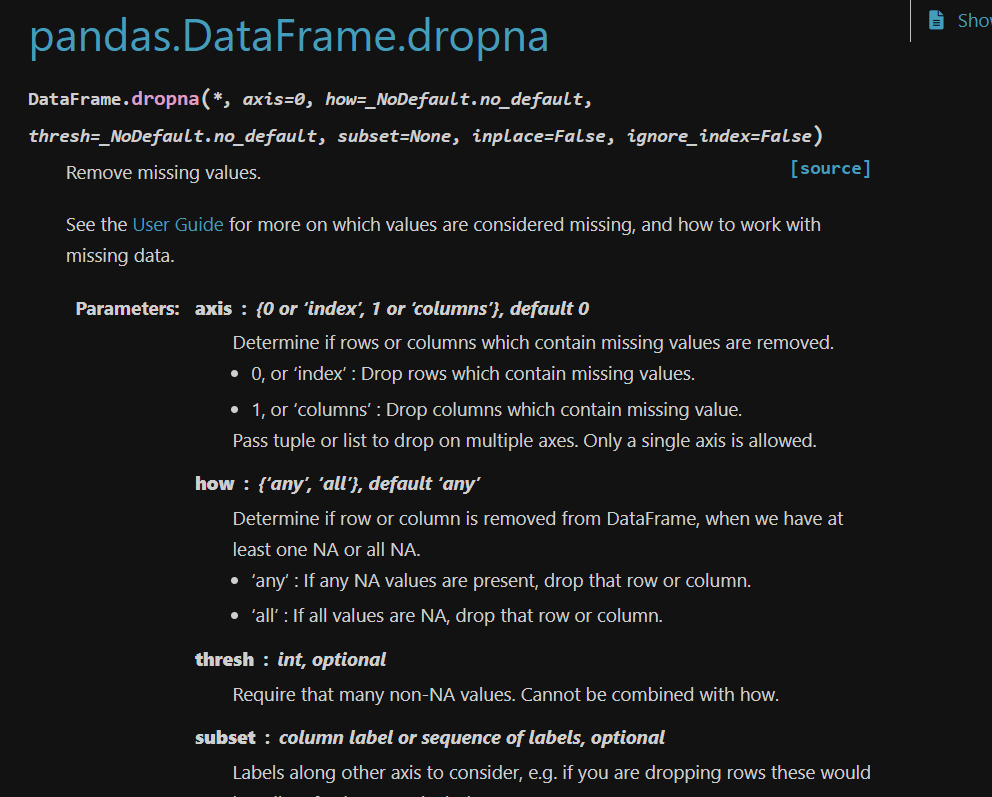

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [11]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


~ 2 Lakh rows x 7 columns = 14L entries

## Exploratory Data Analysis and Data Pre-Processing 


In [12]:
stats = data.describe().T #returns the transposed version of the data summary 
stats

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000


In Python, data.describe() and data.describe().T are two different methods used to get summary statistics of a given DataFrame or Series object.

data.describe() returns a DataFrame containing various statistics such as count, mean, standard deviation, minimum, and maximum values for each numeric column in the given DataFrame. This method returns the summary statistics in a vertical format, with columns representing the different statistics and rows representing the different numeric columns in the DataFrame.

On the other hand, data.describe().T returns a transposed version of the summary statistics DataFrame obtained from data.describe(). The .T attribute of the DataFrame object is used to transpose the rows and columns of the DataFrame, effectively converting the vertical format to a horizontal format. This method returns the same summary statistics as data.describe(), but in a horizontal format, with rows representing the different statistics and columns representing the different numeric columns in the DataFrame.

In summary, data.describe() returns the summary statistics in a vertical format, while data.describe().T returns the same summary statistics in a horizontal format.

In [13]:
stats
stats = stats.drop('count',axis=1)

The drop() method removes the specified row or column.

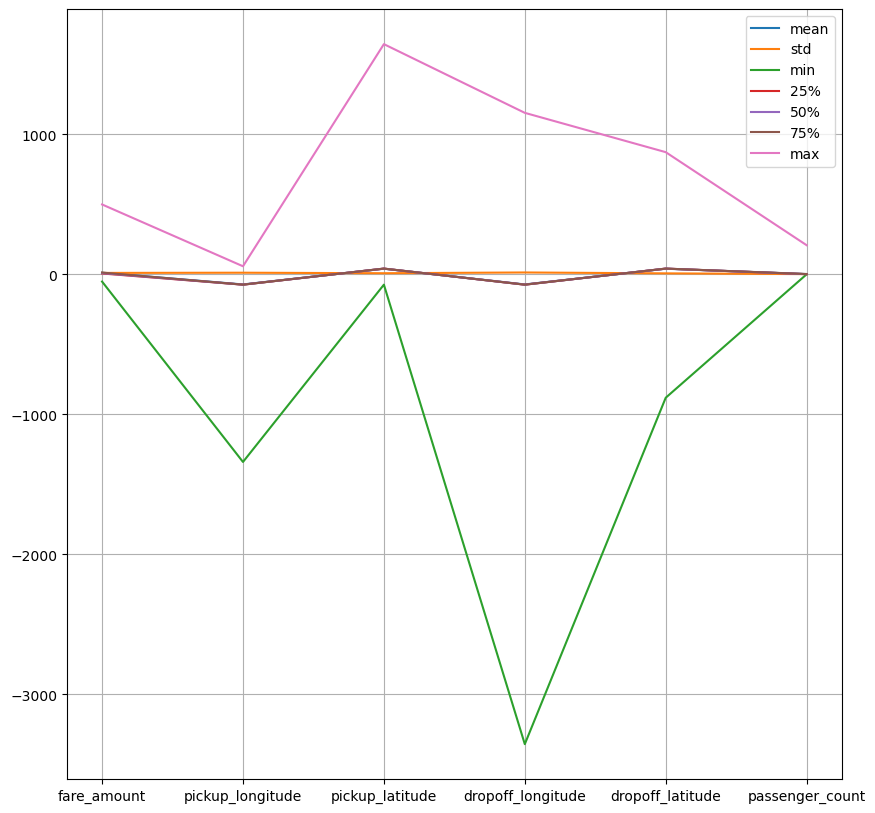

In [14]:
stats.plot(figsize=(10,10), kind='line', grid='true')
plt.show()

- Possibility of some outliers in fare amount and passenger 

- Outliers: 
    - Fare amount in between -52 to 499. The negative amount seems unrealistic. Base fare to be set at $2.5
    - Passenger count max is 208, which is also not possible. Max to be set at 5 
    

Identifying Correlations 
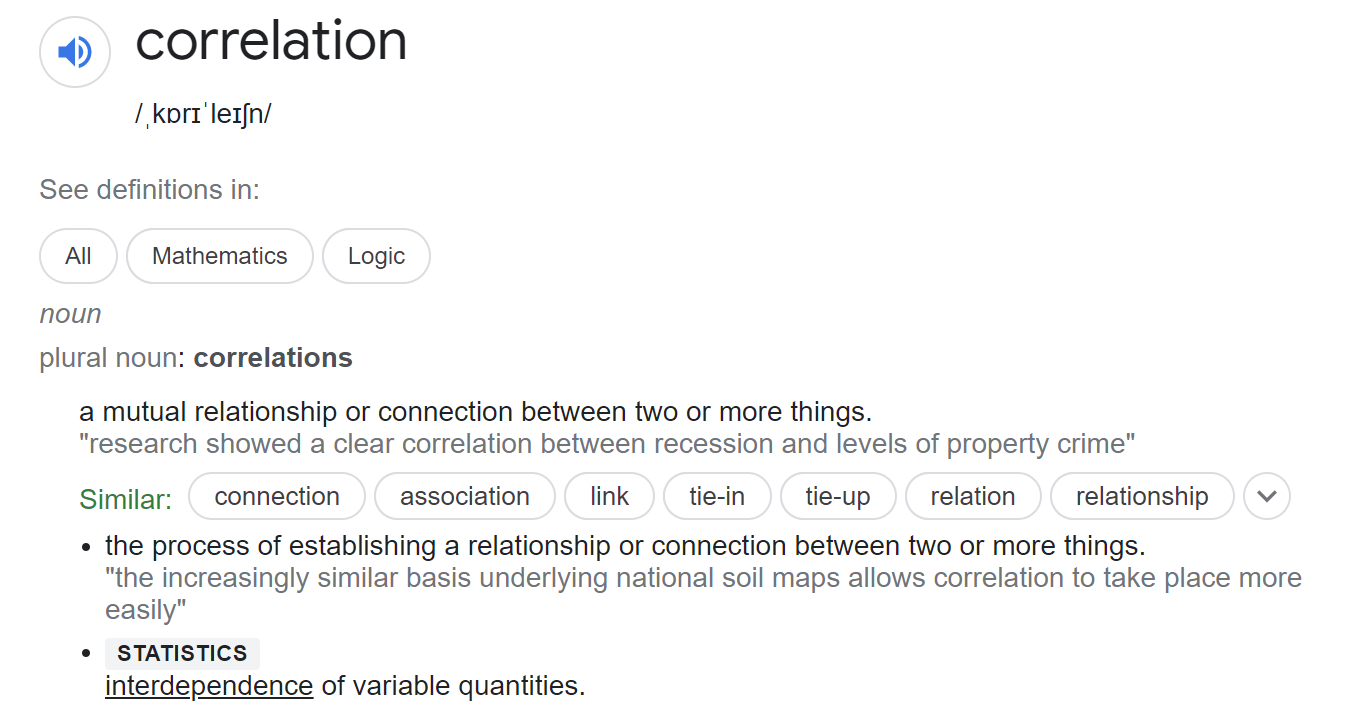

In [15]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

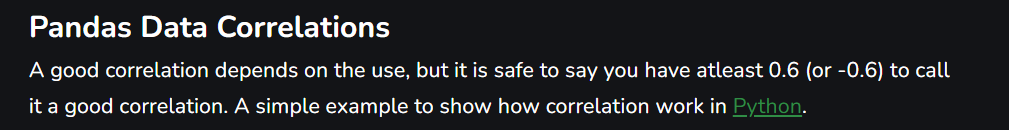

<AxesSubplot:>

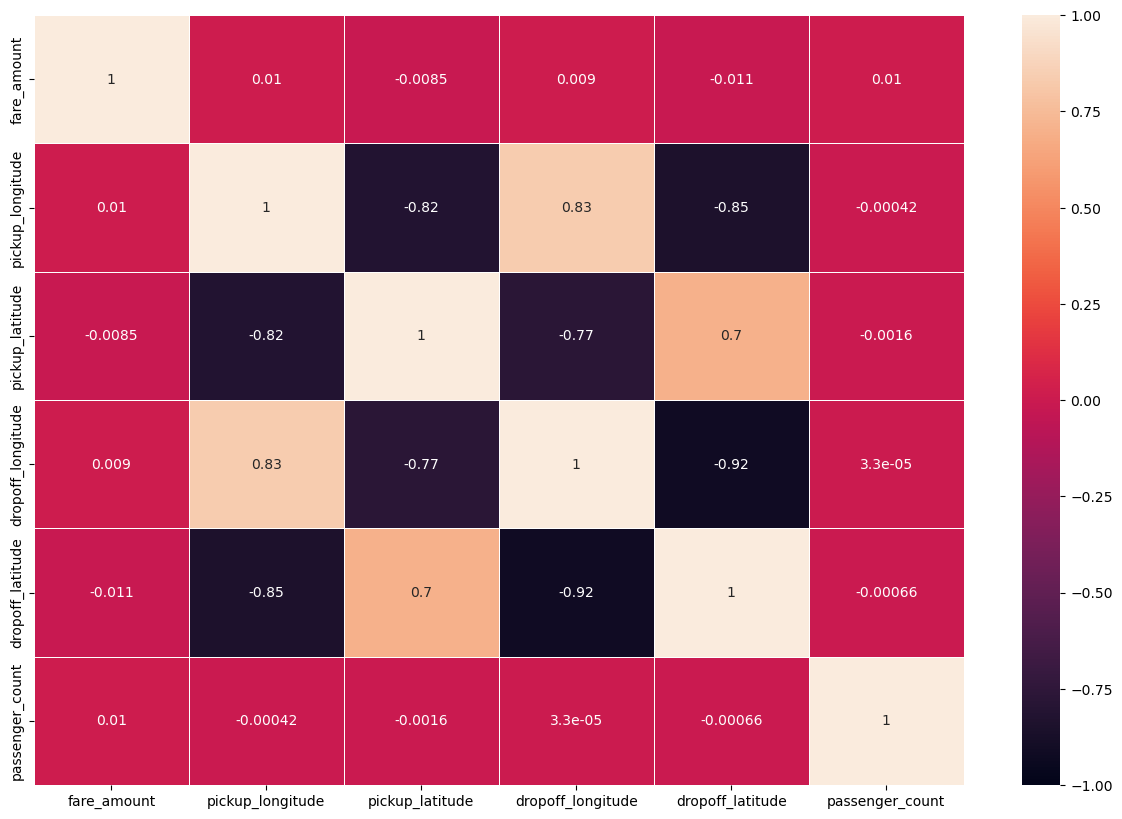

In [16]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

High correlation can be observed between the geo-spatial data points, which was expected. Therefore, there is no need to drop any of the independent variables

Haversine Distance Calculation 
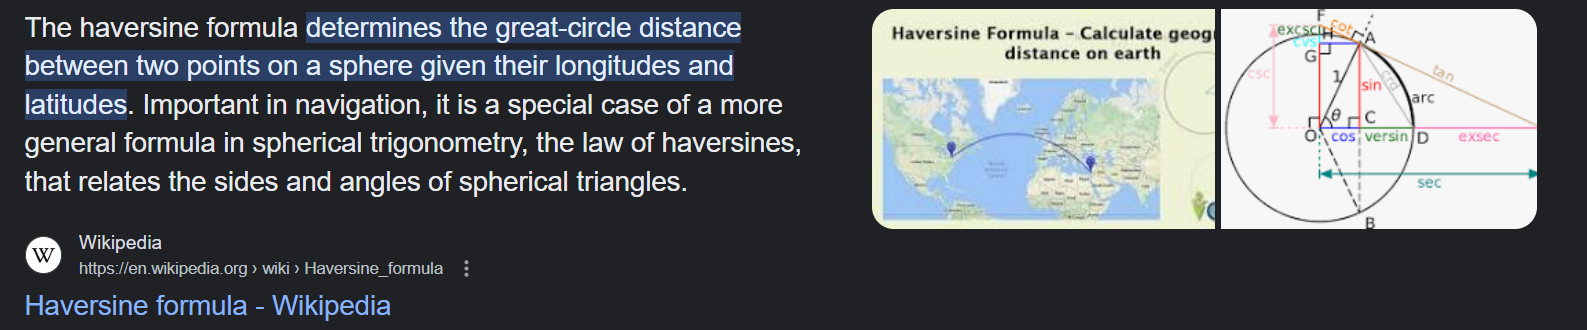

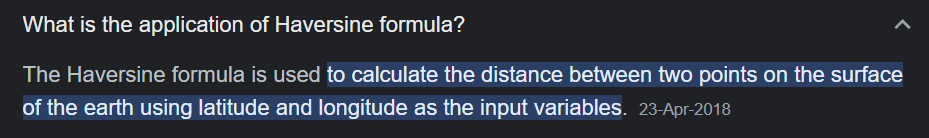

Haversine distance is preferred over Euclidean distance in cases where the distances are being calculated between points on the surface of a sphere, such as the Earth. This is because the Earth is not a flat surface, so using Euclidean distance (which assumes a flat surface) can result in inaccurate measurements.

Haversine distance is a formula used to calculate the distance between two points on the surface of a sphere. It takes into account the curvature of the Earth, and therefore provides a more accurate measurement of distance between two points on the Earth's surface.

Euclidean distance, on the other hand, assumes that the distance between two points is a straight line, which is not true on the surface of a sphere. Therefore, using Euclidean distance to calculate distances between points on the Earth's surface can result in significant errors.

In summary, Haversine distance is preferred over Euclidean distance when calculating distances between points on the surface of a sphere, such as the Earth, because it takes into account the curvature of the surface and provides a more accurate measurement of distance.

In [17]:
from math import *

In [18]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [19]:
# Calculate Haversine distance for each row and add distance in km as a new column
data['distance_travelled'] = distance(data['pickup_longitude'].to_numpy(),
                                                data['pickup_latitude'].to_numpy(),
                                                data['dropoff_longitude'].to_numpy(),
                                                data['dropoff_latitude'].to_numpy()
                                              )

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         199999 non-null  float64
 1   pickup_datetime     199999 non-null  object 
 2   pickup_longitude    199999 non-null  float64
 3   pickup_latitude     199999 non-null  float64
 4   dropoff_longitude   199999 non-null  float64
 5   dropoff_latitude    199999 non-null  float64
 6   passenger_count     199999 non-null  int64  
 7   distance_travelled  199999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.7+ MB


In [21]:
# As we can see, pickup_datetime is being read as an object data type. However, we need to convert it into datetime data type
data['pickup_datetime']  = pd.to_datetime(data['pickup_datetime'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 13.7 MB


## Feature Engineering

Feature engineering is the process that takes raw data and transforms it into features that can be used to create a predictive model using machine learning or statistical modeling, such as deep learning.

In [23]:
# From pickup_datetime extract date, month, year, weekday and dayname
from datetime import datetime

data['date'] = pd.to_datetime(data['pickup_datetime']).dt.date
data['month'] = pd.to_datetime(data['pickup_datetime']).dt.month
data['year'] = pd.to_datetime(data['pickup_datetime']).dt.year
data['day_of_the_week'] = pd.to_datetime(data['pickup_datetime']).dt.weekday
data['day_name'] = pd.to_datetime(data['pickup_datetime']).dt.day_name()
data['pickup_time'] = pd.to_datetime(data['pickup_datetime']).dt.time
data['pickup_hour'] = pd.to_datetime(data['pickup_datetime']).dt.hour

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
 8   date                199999 non-null  object             
 9   month               199999 non-null  int64              
 10  year                199999 non-null  int64              
 11  day_of_the_week     199999 non-null  int64              
 12  day_name        

Outlier Treatment 

- The following treatment is being done to outliers:
    - passsenger_count should be less than 5
    - rows with passenger_count = 0 should be dropped 
    - fare_amount should be kept to the minimum set by Uber, i.e. $2.5 
    - distance should be maximum 130km
    - distance travelled cannot be zero. Rows with distance = 0 must be dropped. 

In [25]:
data.drop(data[data['passenger_count'] > 5].index, axis=0, inplace = True)
data.drop(data[data['passenger_count'] == 0].index, axis=0, inplace = True)
data.drop(data[data['fare_amount'] < 2.5].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] > 130].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] == 0].index, axis=0, inplace = True)
data.dropna(axis=0,inplace=True)

In [26]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,date,month,year,day_of_the_week,day_name,pickup_time,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07,5,2015,3,Thursday,19:52:06,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17,7,2009,4,Friday,20:04:56,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24,8,2009,0,Monday,21:45:00,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26,6,2009,4,Friday,08:22:21,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28,8,2014,3,Thursday,17:47:00,17


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,189061.0,11.336739,9.730745,2.500000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,189061.0,-73.916225,2.560946,-75.419276,-73.992274,-73.982133,-73.968465,40.808425
pickup_latitude,189061.0,40.696089,2.634751,-74.015515,40.736440,40.753273,40.767532,401.066667
dropoff_longitude,189061.0,-73.915258,2.561027,-75.423067,-73.991594,-73.980564,-73.965513,40.831932
dropoff_latitude,189061.0,40.694481,2.501323,-74.015750,40.735345,40.753738,40.768327,45.031598
passenger_count,189061.0,1.595115,1.150926,1.000000,1.000000,1.000000,2.000000,5.000000
distance_travelled,189061.0,3.377859,3.984585,0.000084,1.279954,2.181325,3.938054,129.610094
month,189061.0,6.282337,3.439349,1.000000,3.000000,6.000000,9.000000,12.000000
year,189061.0,2011.719302,1.862527,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
day_of_the_week,189061.0,3.049095,1.946679,0.000000,1.000000,3.000000,5.000000,6.000000


In [28]:
# Dropping the columns 'pickup datetime' and 'pickup hour' as we have extracted relvant pieces of information
# from these columns and do not need these columns for our analysis now. Also, 'date' and 'day_name', month and year
# as well as pickup and dropoff coordinates are not required as we have the required data extracted from them

data = data.drop(['pickup_datetime','pickup_time', 'date', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_longitude', 'dropoff_latitude', 'day_name'],axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189061 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         189061 non-null  float64
 1   passenger_count     189061 non-null  int64  
 2   distance_travelled  189061 non-null  float64
 3   month               189061 non-null  int64  
 4   year                189061 non-null  int64  
 5   day_of_the_week     189061 non-null  int64  
 6   pickup_hour         189061 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.5 MB


# Numerical Features - Univariate Analysis 
#### Boxplot and Histogram 
### Distance

<AxesSubplot:xlabel='distance_travelled'>

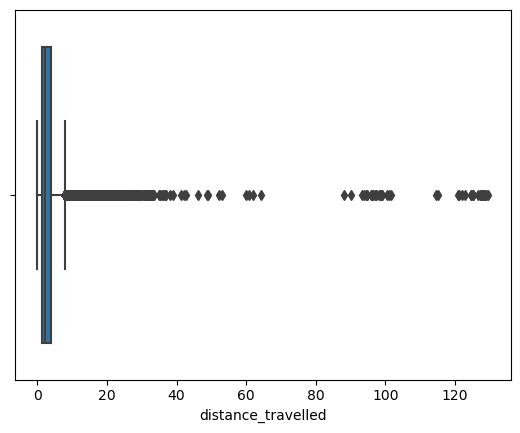

In [30]:
data
sns.boxplot(x=data['distance_travelled'])

Maximum trips have distances between 0 and 8 Km, a few more than 8 and a few outliers too

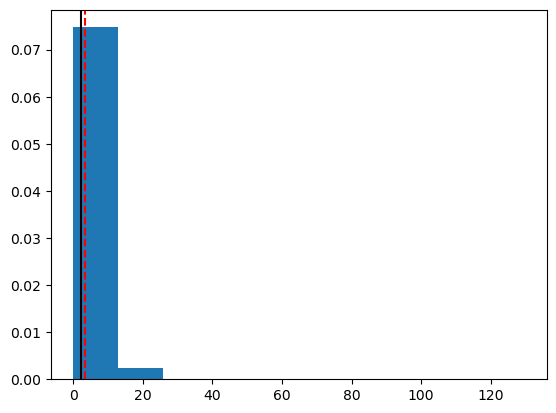

In [31]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['distance_travelled'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be
# ignored when calculating the mean)
plt.axvline(data['distance_travelled'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs 
# will be ignored when calculating the median)
plt.axvline(data['distance_travelled'].median(), color = 'black', linestyle='-')

- Observations:
    - Negatively skewed 
    - Outliers on the left end 
    - Mean and Median are close 
   

Negatively skewed means that the distribution of a set of data has a long tail to the left, with the majority of the data points clustering towards the right side of the distribution. In other words, the mean of the data is less than the median, and the mode is greater than the mean.

When a distribution is negatively skewed, it is also referred to as being left-skewed. This type of distribution can occur when there are a few extreme values or outliers on the left side of the distribution, which can pull the mean towards the left.

Some examples of data that may exhibit a negatively skewed distribution include income data, where a few high earners may pull the mean income down, or exam scores, where a few very low scores can pull the mean score down. Understanding the skewness of a dataset is important for statistical analysis, as it can affect the interpretation of summary statistics and the choice of appropriate statistical methods.

## Categorical Features - Univariate Analysis 

Passenger Count 

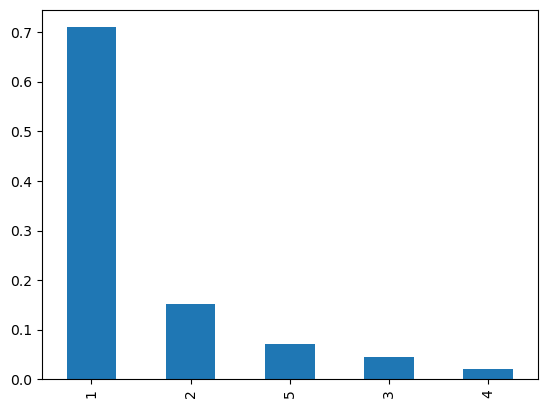

In [32]:
data['passenger_count'].value_counts(normalize = True).plot.bar()
plt.show()

- Plot of Percentage (in decimal) v/s No. of passengers
- Almost 70% of trips had only one passenger 
- 2 passengers in 15% of the trips 
- 5 passengers are in 8% of the trips 
- 4 has minimum frequency


Day of the week

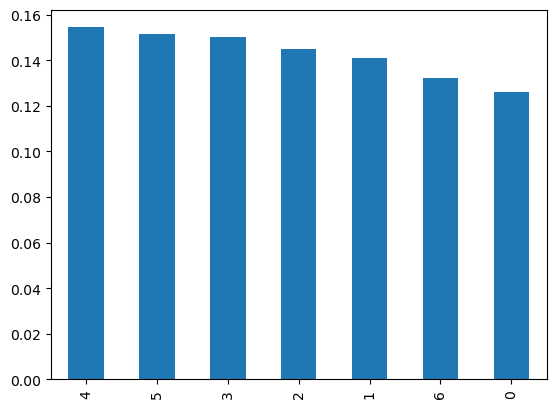

In [33]:
data['day_of_the_week'].value_counts(normalize = True).plot.bar()
plt.show()

- As expected, Friday (weekend eve) and Saturday have the highest number of trips 
- 0 - Monday and 6 - Sunday ----> Legend

Pickup Time

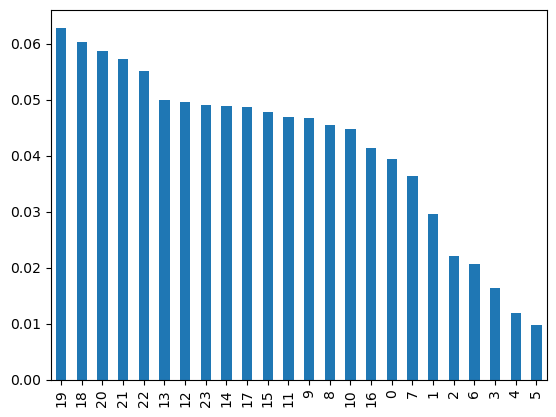

In [34]:
data['pickup_hour'].value_counts(normalize = True).plot.bar()
plt.show()

- As expected, the number of trips are low during 1am - 5am, and peak between 7pm-9pm
- Note the hours are specified in 24 hr format 
- We can clearly see that during weekdays, peak hours are during the day while on weekends, peak hours are late in the night

## Bivariate/ Multivariate Analysis 

In [35]:
!pip install geopandas
import geopandas as gpd

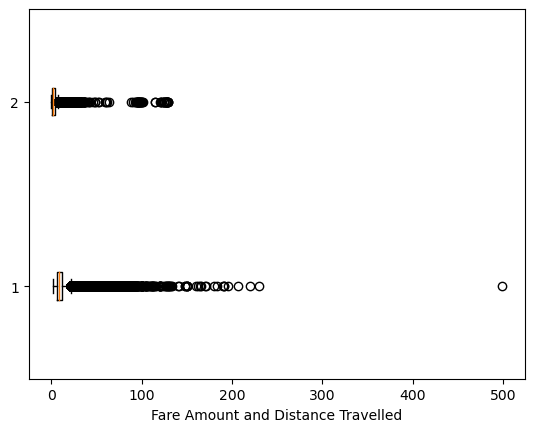

In [36]:
import matplotlib.pyplot as plt

# Assuming data is a Pandas DataFrame
plt.boxplot([data.fare_amount, data.distance_travelled], vert=False)
plt.xlabel('Fare Amount and Distance Travelled')
plt.show()


Generally, as distance increases, the fare amount also increases with a few sporadic inconsistencies 


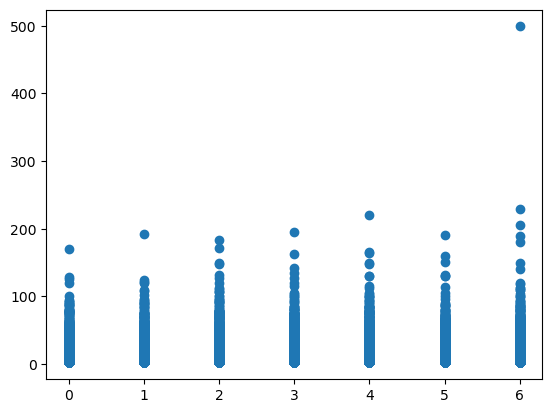

In [37]:
#Scatte plot of day of the week vs fare amount
plt.scatter(x = data.day_of_the_week, y = data.fare_amount)

# Show the plot
plt.show()

Generally speaking, weekend fares are higher than weekday fares. This could be due to distance travelled or due to peak hours.

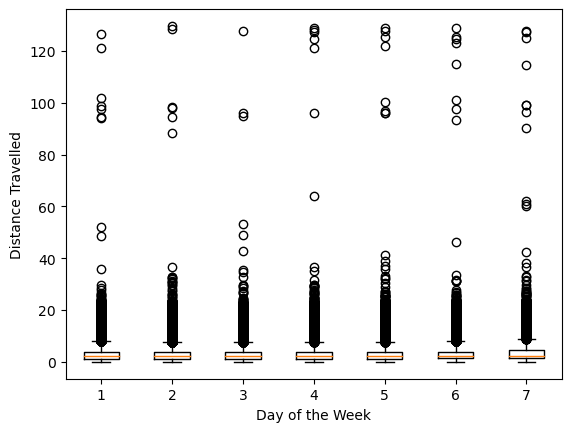

In [38]:
import matplotlib.pyplot as plt

# Assuming data is a Pandas DataFrame
plt.boxplot(data[data.distance_travelled.notnull()].groupby('day_of_the_week')['distance_travelled'].apply(list))
plt.xlabel('Day of the Week')
plt.ylabel('Distance Travelled')
plt.show()


We see that there isn't much of a relationship between distance travelled vs day of the week - thus, it is appears that fare amount being higher on weekends has a high likelihood of being linked to peak hours/ wait time due to higher traffic
Unfortunately, we do not have the dropoff time for each ride to be able to ascertain the time of each trip and demonstrate if we can see a relationship between fare and time travelled 

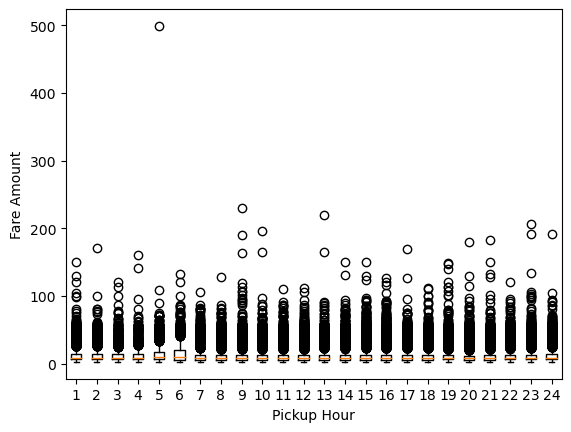

In [39]:
import matplotlib.pyplot as plt

# Assuming data is a Pandas DataFrame
plt.boxplot(data[data.fare_amount.notnull()].groupby('pickup_hour')['fare_amount'].apply(list))
plt.xlabel('Pickup Hour')
plt.ylabel('Fare Amount')
plt.show()


We do see some pickup times having a greater % of higher fares as compared to others - however, it is difficult to draw a concluding relationship 

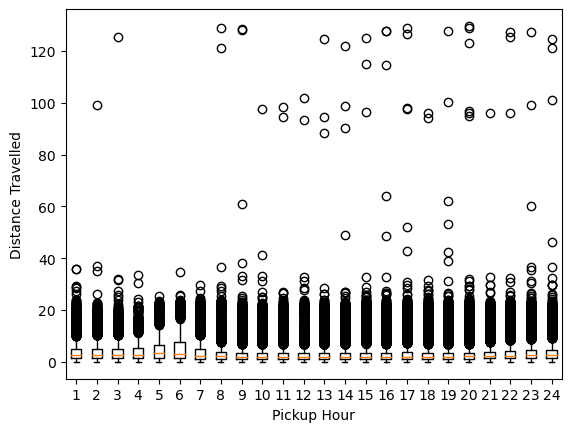

In [40]:
import matplotlib.pyplot as plt

# Assuming data is a Pandas DataFrame
plt.boxplot(data[data.distance_travelled.notnull()].groupby('pickup_hour')['distance_travelled'].apply(list))
plt.xlabel('Pickup Hour')
plt.ylabel('Distance Travelled')
plt.show()


Some pickup hours have a greater concetration of trips where a high distance was travelled as compared to others

Data Preparation 

Feature Scaling

- Feature Scaling is requried because of two reasons:
    - the data points are far from each other. This means that in some columns, the distance between data points is a lot 
    - Some of the features have a unit while other features are unitless. Therefore, it is importance to make all features unitless.
    

In [41]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

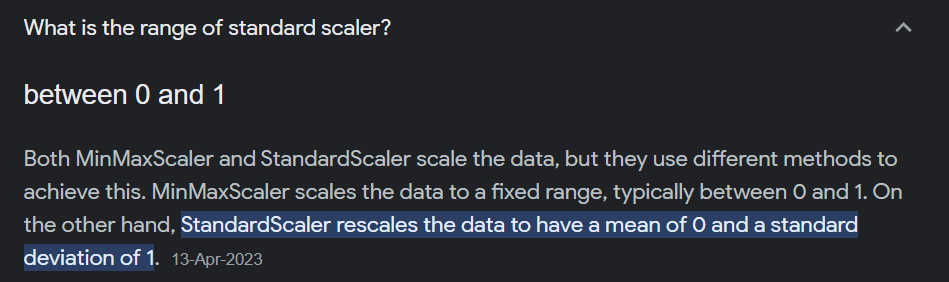

In [42]:
x = data.drop(['fare_amount'], axis = 1)
y = data['fare_amount'].values.reshape(-1, 1)

In [43]:
y_std = std.fit_transform(y)

x_std = std.fit_transform(x)

In [44]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 42)

In [45]:
x_train.shape

(132342, 6)

In [46]:
y_train.shape

(132342, 1)

In [47]:
x_test.shape

(56719, 6)

In [48]:
y_test.shape

(56719, 1)

## Regression Models

Linear Regression 

In [49]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [50]:
LR_pred = LR.predict(x_test)

In [51]:
print("Training set score: {:.2f}".format(LR.score(x_train, y_train)))
print("Test set score: {:.7f}".format(LR.score(x_test, y_test)))

Training set score: 0.65
Test set score: 0.5782372


In [52]:
from sklearn import metrics
from sklearn.metrics import r2_score

MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
r2_LR=r2_score(y_test, LR_pred)
Adj_r2_LR=1-(1-r2_score(y_test, LR_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [53]:
print('Mean absolute error of linear regression',MAE_LR)
print('Mean square  error of linear regression',MSE_LR)
print('root Mean square error of linear regression',RMSE_LR)
print('r2 score of linear regression',r2_LR)
print('adjusted r2 of linear regression',Adj_r2_LR)

Mean absolute error of linear regression 0.2573904473859178
Mean square  error of linear regression 0.4147342387915014
root Mean square error of linear regression 0.6439986326006457
r2 score of linear regression 0.5782372370795463
adjusted r2 of linear regression 0.5781926155430546


Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [55]:
DTpreds = DT.predict(x_test)

In [56]:
print("Training set score: {:.2f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(x_test, y_test)))

Training set score: 1.00
Test set score: 0.5430495


In [57]:
MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))
r2_DT=r2_score(y_test, DTpreds)
Adj_r2_DT=1-(1-r2_score(y_test, DTpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [58]:
print('Mean absolute error of decision tree',MAE_DT)
print('Mean square  error of decision tree',MSE_DT)
print('root Mean square error of decision tree',RMSE_DT)
print('r2 score of decision tree',r2_DT)
print('adjusted r2 of decision tree',Adj_r2_DT)

Mean absolute error of decision tree 0.30631443534774094
Mean square  error of decision tree 0.44933556098328004
root Mean square error of decision tree 0.670324966701435
r2 score of decision tree 0.5430495243630132
adjusted r2 of decision tree 0.5430011800469281


Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [60]:
RFpreds = RF.predict(x_test)

In [61]:
print("Training set score: {:.2f}".format(RF.score(x_train, y_train)))
print("Test set score: {:.7f}".format(RF.score(x_test, y_test)))

Training set score: 0.97
Test set score: 0.7892852


In [62]:
MAE_RF= metrics.mean_absolute_error(y_test, RFpreds)
MSE_RF= metrics.mean_squared_error(y_test, RFpreds)
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test, RFpreds))
r2_RF=r2_score(y_test, RFpreds)
Adj_r2_RF=1-(1-r2_score(y_test, RFpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [63]:
print('Mean absolute error of random forest',MAE_RF)
print('Mean square  error of random forest',MSE_RF)
print('root Mean square error of random forest',RMSE_RF)
print('r2 score of random forest',r2_RF)
print('adjusted r2 of random forest',Adj_r2_RF)

Mean absolute error of random forest 0.22514380622099772
Mean square  error of random forest 0.20720334970586435
root Mean square error of random forest 0.4551959464954234
r2 score of random forest 0.78928516364367
adjusted r2 of random forest 0.7892628704955155


## Boosting

In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.

In [64]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

Gradient Boosting

In [65]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(x_train, y_train.ravel())
predictions_gbr = gbr.predict(x_test)

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees

In [66]:
print("Training set score: {:.2f}".format(gbr.score(x_train, y_train)))
print("Test set score: {:.7f}".format(gbr.score(x_test, y_test)))

Training set score: 0.82
Test set score: 0.7828862


In [67]:
MAE_GBR= metrics.mean_absolute_error(y_test, predictions_gbr)
MSE_GBR= metrics.mean_squared_error(y_test, predictions_gbr)
RMSE_GBR= np.sqrt(metrics.mean_squared_error(y_test, predictions_gbr))
r2_GBR=r2_score(y_test, predictions_gbr)
Adj_r2_GBR=1-(1-r2_score(y_test, predictions_gbr))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [68]:
print('Mean absolute error of gradient boosting regressor',MAE_GBR)
print('Mean square  error of gradient boosting regressor',MSE_GBR)
print('root Mean square error of gradient boosting regressor',RMSE_GBR)
print('r2 score of gradient boosting regressor',r2_GBR)
print('adjusted r2 of gradient boosting regressor',Adj_r2_GBR)

Mean absolute error of gradient boosting regressor 0.2119350848285695
Mean square  error of gradient boosting regressor 0.2134956752780714
root Mean square error of gradient boosting regressor 0.46205592224109776
r2 score of gradient boosting regressor 0.7828862016812764
adjusted r2 of gradient boosting regressor 0.7828632315375694


XGBoost Classifier

In [69]:
!pip install xgboost
from xgboost import XGBRegressor

In [70]:
xgb = XGBRegressor(random_state = 42, scale_pos_weight = 1)
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)

In [71]:
print("Training set score: {:.2f}".format(xgb.score(x_train, y_train)))
print("Test set score: {:.7f}".format(xgb.score(x_test, y_test)))

Training set score: 0.88
Test set score: 0.7880571


In [72]:
MAE_XGB= metrics.mean_absolute_error(y_test, predictions_xgb)
MSE_XGB= metrics.mean_squared_error(y_test, predictions_xgb)
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb))
r2_XGB=r2_score(y_test, predictions_xgb)
Adj_r2_XGB=1-(1-r2_score(y_test, predictions_xgb))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [73]:
print('Mean absolute error of XGB regressor',MAE_XGB)
print('Mean square  error of XGB regressor',MSE_XGB)
print('root Mean square error of XGB regressor',RMSE_XGB)
print('r2 score of XGB regressor',r2_XGB)
print('adjusted r2 of XGB regressor',Adj_r2_XGB)

Mean absolute error of XGB regressor 0.21013585337713858
Mean square  error of XGB regressor 0.20841097125744246
root Mean square error of XGB regressor 0.4565205047502713
r2 score of XGB regressor 0.7880570764627322
adjusted r2 of XGB regressor 0.7880346533857604


## Choosing the Best Models 

In [74]:
cols = ['Model', 'MSE', 'RMSE', 'R2_score','MAE','ADJ_r']

# create a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

In [75]:
full_metrics = pd.Series({'Model': "Linear Regression", 'MSE': MSE_LR, 'RMSE' : RMSE_LR, 'R2_score' : r2_LR,'MAE':MAE_LR,'ADJ_r':Adj_r2_LR})

In [76]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)


In [77]:
full_metrics = pd.Series({'Model': "Decision Tree", 'MSE': MSE_DT, 'RMSE' : RMSE_DT, 'R2_score' : r2_DT,'MAE':MAE_DT,'ADJ_r':Adj_r2_DT})

In [78]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [79]:
full_metrics = pd.Series({'Model': "Random Forest", 'MSE': MSE_RF, 'RMSE' : RMSE_RF, 'R2_score' : r2_RF,'MAE':MAE_RF,'ADJ_r':Adj_r2_RF})

In [80]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [81]:
full_metrics = pd.Series({'Model': "Gardient Boosting", 'MSE': MSE_GBR, 'RMSE' : RMSE_GBR, 'R2_score' : r2_GBR,'MAE':MAE_GBR,'ADJ_r':Adj_r2_GBR})

In [82]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [83]:
full_metrics = pd.Series({'Model': "XGBoost", 'MSE': MSE_XGB, 'RMSE' : RMSE_XGB, 'R2_score' : r2_XGB,'MAE':MAE_XGB,'ADJ_r':Adj_r2_XGB})

In [84]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [85]:
# # # result_table
# # # from IPython.display import display

# # # # Display your DataFrame
# # # display(result_table)
# # import pandas as pd

# # # Enable the option to display DataFrames as HTML tables
# # pd.set_option("display.notebook_repr_html", True)

# # # Display your DataFrame
# # print(result_table)
# # Ensure both DataFrames have the same columns
# assert set(result_table.columns) == set(full_metrics.columns), "DataFrames have mismatched columns"

# # Append full_metrics DataFrame to result_table DataFrame
# result_table = result_table.append(full_metrics, ignore_index=True)

# # Display the result_table DataFrame
# display(result_table)
result_table

,Model,MSE,RMSE,R2_score,MAE,ADJ_r,0
0,NaN,NaN,NaN,NaN,NaN,NaN,Linear Regression
1,NaN,NaN,NaN,NaN,NaN,NaN,0.414734
2,NaN,NaN,NaN,NaN,NaN,NaN,0.643999
3,NaN,NaN,NaN,NaN,NaN,NaN,0.578237
4,NaN,NaN,NaN,NaN,NaN,NaN,0.25739
5,NaN,NaN,NaN,NaN,NaN,NaN,0.578193
6,NaN,NaN,NaN,NaN,NaN,NaN,Decision Tree
7,NaN,NaN,NaN,NaN,NaN,NaN,0.449336
8,NaN,NaN,NaN,NaN,NaN,NaN,0.670325
9,NaN,NaN,NaN,NaN,NaN,NaN,0.54305


Based on the above, Random Forest produces the best results out of all tested models with Maximum R2 Score. However, hyperparameter tuning could help improve the results. It is worth noting that the results of Random forest are overfitted and hence the best fitted and good model, with accuracy > 80 % is Gradient Boosting